![Tulane](https://upload.wikimedia.org/wikipedia/en/7/7e/Tulane_logo.svg)

# CMPS 6730: Natural Language Processing

**Classification I**  

[Aron Culotta](https://cs.tulane.edu/~aculotta/)  
[Tulane University](https://cs.tulane.edu/)

<a href="http://colab.research.google.com/github/tulane-cmps6730/main/blob/main/notebooks/02_Classification_1.ipynb">
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Google_Colaboratory_SVG_Logo.svg/320px-Google_Colaboratory_SVG_Logo.svg.png"  width=10%/></a>
<a href="https://github.com/tulane-cmps6730/main/tree/main">
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/GitHub_Invertocat_Logo.svg/240px-GitHub_Invertocat_Logo.svg.png" width=6%/></a>


In the previous module, we learned how to formulate a machine learning problem.  In this module, we will explore two machine learning models for text classification: Naive Bayes and Logistic Regression.

## Naive Bayes Classifier





Recall that for a machine learning task are given training data $D = \{(\vec{x}_1, y_1), \ldots, (\vec{x}_n, y_n)\}$

||free|money| |*label*|
|:--:|:--------:|:--------:|:--:|:--:|
||$x_{i1}$|$x_{i2}$| | $y_i$ |
|$x_1$|0|0||-1|
|$x_2$|1|0|| 1|
|$x_3$|1|1||-1|
|$x_4$|1|0||-1|
|$x_5$|1|1||1|
|$x_6$|0|0||1|
|$x_7$|0|1||-1|

<br>

How can we classify a new instance?  
 "free money" -> $\{1,1\}$

<br>

One approach: estimate the probability

$p(y \mid \vec{x})$

e.g., $p(y=1 \mid \vec{x}=\{1,1\})$

=>"What is the probability that this document is spam ($y=1$) given the document represented by vector $\vec{x}$?"

<br>

Thus, to classify an instance $\vec{x}$, we need $p(y \mid \vec{x})$.

E.g., if $p(y=1 \mid \vec{x}) > p(y=-1 \mid \vec{x})$, then classify $\vec{x}$ as 1.

<br><br><br><br>

### Conditional probability

Recall the definition of a conditional probability:

$$ p(y \mid x) = \frac{p(x,y)}{p(x)}$$

> "the probability of $y$ *given* $x$ is equal to the probability of $y$ *and* $x$ divided by the probability of $x$"

> Of 100 students,
>  - 40 got an A on Test 1
>  - 30 got an A on Test 2
>  - 20 got As on boths Tests 1 and 2

> If a student chosen at random got an A on Test 1, what is the probability they also got an A on Test 2?

<br><br>

$$ P(T2=A \mid T1=A)$$

<br><br>

$$P(T2=A \mid T1=A) = \frac{P(T1=A, T2=A)}{P(T1=A)} = \frac{0.2}{0.4} = 0.5$$

<br>

By applying that axiom to $p(x \mid y)$ and rearranging terms, we also have:

$$p(x,y) = p(x \mid y)p(y)$$

<br><br>

### Bayes rule

$$
p(y \mid x) = \frac{p(x \mid y)p(y)}{p(x)}
$$

There are no assumptions being made in this rule – it’s simply an application of the laws of probability. In particular, it just applies two other rules of probability:
- $p(y \mid x) = \frac{p(x,y)}{p(x)}$
- $p(x,y) = p(x \mid y)p(y)$



Using Bayes' rule, we can rewrite $p(y \mid \vec{x})$ as:

$$
p(y \mid \vec{x}) = \frac{p(\vec{x} \mid y)p(y)}{p(\vec{x})}
$$

<br><br><br>
Three terms:

1. $p(y)$: **prior** probability of class y.
$$p(y=1) = \frac{\sum_{(\bar{x}_i, y_i) \in D} 1[y_i=1]}{|D|}$$
 - $1[x]= 1 $ if $x$ is True, $0$ otherwise.
<br><br><br>

2. $p(\vec{x})$: **evidence** (probability of this document)
$$p(\vec{x}) = \sum_{y^k \in \{-1, 1\}} p(\vec{x} | y=y^k)p(y=y^k)$$
  - This is just the sum of the numerator for all settings of $y$
<br><br><br>

3. $p(\vec{x}|y)$ **likelihood**
  - This is harder to estimate.


<br><br><br><br>

**Estimating $p(\vec{x}|y)$:**


| free | money| p($\mathbf{\vec{x}} \mid$ y=1) | p($\mathbf{\vec{x}} \mid$ y=-1) |
|------|------|-----------------------|------------------------|
|  0   |  0   |         ?             |            ?           |
|  0   |  1   |         ?             |            ?           |
|  1   |  0   |         ?             |            ?           |
|  1   |  1   |         ?             |            ?           |

(assuming binary feature values)


We'd like to be able to compute this just like $p(y)$:

$$
p(\vec{x}=\{0,0\}|y=1) = \frac{\sum_{(x_i, y_i) \in D} 1[\vec{x}_i=\{0,0\} \wedge y_i=1]}{\sum_i 1[y_i=1]}
$$
i.e., what percentage of documents with label $y=1$ have feature vector $\{0, 0\}$?

<br><br><br>
Clearly, this does not scale.

Size of table above?
<br><br><br>

$k*2^d$, where $d$ is the number of features and $k$ is the number of classes. In text classification, $d$ is often in the tens of thousands.

Even more ridiculous if we move from binary features to feature counts.

<br><br><br><br>

### Instead, we make a **conditional independence assumption.**

This assumption is what is Naïve about Naïve Bayes.

Recall, conditional independence means that $p(a,b|c) = p(a|c)p(b|c)$. Here, we assume each feature value is independent of others given the class label:

$$p(\vec{x_i} | y=1) =  p(\{x_{i1}, x_{i2}, \ldots x_{id}\}|y=1) \approx  p(x_{i1}|y=1) p(x_{i2}|y=1) \ldots p(x_{id}|y=1)$$

Thus, our table of parameters to estimate becomes linear:




| free | p(free $\mid$ y=1) | p(free $\mid$ y=-1) |
|------|--------------------|---------------------|
|  0   | ?                  |          ?          |
|  1   | ?&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                    |          ? &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;           |

| money | p(free $\mid$ y=1) | p(free $\mid$ y=-1) |
|-------|--------------------|---------------------|
|  0    | ?                  |          ?          |
|  1    | ?&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                    |          ? &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;           |

Number of parameters: $k*d$,  
where $d$ is the number of features and $k$ is the number of classes.

<br><br><br>

Our classification formula then becomes:

$$
p(y|\vec{x}) = \frac{p(y)\prod_j p(x_{ij}|y)}{p(\vec{x})}
$$


<br>

$$ \prod_j p(x_{ij}|y) $$


So, we have one word distribution per class (assignment to $y$).   
Is this sentence more likely according to class 1 or class -1?



**Estimating $p(x_{ij}|y)$:**

When term features are **binary**, we call this a **[Bernoulli](https://en.wikipedia.org/wiki/Bernoulli_distribution)** model (word presence is outcome of a biased coin flip)

$$p(x_{k}=1|y=1) = \frac{p(x_k=1, y=1)}{p(y=1)} = \frac{\sum_{(x_i, y_i) \in D}1[x_{ik}=1 \wedge y_i=1]}{\sum_{(x_i, y_i) \in D} 1[y_i=1]}$$
i.e., what proportion of documents where $y=1$ have term $k$?

<br><br>

We can compute similar values for term absence, as well as for other classes:

$$p(x_{k}=0|y=1) = \frac{\sum_{(x_i, y_i) \in D}1[x_{ik}=0 \wedge y_i=1]}{\sum_{(x_i, y_i) \in D} 1[y_i=1]}$$
i.e., what proportion of documents where $y=1$ **do not** have term $k$?

<br><br>

$$p(x_{k}=1|y=-1) = \frac{\sum_{(x_i, y_i) \in D}1[x_{ik}=1 \wedge y_i=-1]}{\sum_{(x_i, y_i) \in D} 1[y_i=-1]}$$
i.e., what proportion of documents where $y=-1$ have term $k$?

<br><br>

$$p(x_{k}=0|y=-1) = \frac{\sum_{(x_i, y_i) \in D}1[x_{ik}=0 \wedge y_i=-1]}{\sum_{(x_i, y_i) \in D} 1[y_i=-1]}$$
i.e., what proportion of documents where $y=-1$ **do not** have term $k$?



Given a specific set of training data:

||free|money| |*label*|
|:--:|:--------:|:--------:|:--:|:--:|
||$x_{i1}$|$x_{i2}$| | $y_i$ |
|$x_1$|0|0||-1|
|$x_2$|1|0|| 1|
|$x_3$|1|1||-1|
|$x_4$|1|0||-1|
|$x_5$|1|1||1|
|$x_6$|0|0||1|
|$x_7$|0|1||-1|


- $p(free=1|y=1) = \frac{2}{3}$
- $p(free=0|y=1) = \frac{1}{3}$
- $p(free=1|y=-1) = \frac{2}{4}$
- $p(free=0|y=-1) = \frac{2}{4}$
<br><br>
- $p(money=1|y=1) = \frac{1}{3}$
- $p(money=0|y=1) = \frac{2}{3}$
- $p(money=1|y=-1) = \frac{2}{4}$
- $p(money=0|y=-1) = \frac{2}{4}$

<br>

Note that $p(x=0|y=1) = 1 - p(x=1|y=1)$

<br><br>

**Estimate Prior:**

- $p(y=1) = \frac{3}{7}$
- $p(y=-1) = \frac{4}{7}$

<br><br>

**Compute probability for a new document:**

$\vec{x} = $ "free money" = $\{1, 1\}$

$$
p(y=1|\vec{x})  =  \frac{p(y=1)\prod_j p(x_{ij}|y=1)}{p(\vec{x})} = \frac{p(y=1)p(free=1|y=1)p(money=1|y=1)}{p(\vec{x})}
$$

$$
= \frac{\frac{3}{7} \cdot \frac{2}{3} \cdot \frac{1}{3}}{p(\vec{x})}
$$

$$
p(y=-1|\vec{x}) = \frac{\frac{4}{7} \cdot \frac{2}{4} \cdot \frac{2}{4}}{p(\vec{x})}
$$

$$
p(\vec{x}) = (\frac{3}{7} \cdot \frac{2}{3} \cdot \frac{1}{3}) + (\frac{4}{7} \cdot \frac{2}{4} \cdot \frac{2}{4}) = .238...
$$

thus

$$
p(y=1|\vec{x}) =  \frac{\frac{3}{7} \cdot \frac{2}{3} \cdot \frac{1}{3}}{.238...} =  .4
$$

$$
p(y=-1|\vec{x}) =  \frac{\frac{4}{7} \cdot \frac{2}{4} \cdot \frac{2}{4}}{.238...} = .6
$$

Note that $p(y=1|\vec{x}) + p(y=-1|\vec{x}) = 1$

<br><br><br>
Note that in this variant of Naive Bayes (Bernoulli), we consider $p(x|y)$ for all terms in the vocabulary, whether they are present or not:

$\vec{x} = $ "free" = $\{1, 0\}$ ("money" is not present)

$$
p(y=1|\vec{x})  =  \frac{p(y=1)\prod_j p(x_{ij}|y=1)}{p(\vec{x})} = \frac{p(y=1)p(free=1|y=1)p(money=0|y=1)}{p(\vec{x})}
$$

<br><br><br><br>

### The problem with 0

||free|money|hippo| *label*|
|:--:|:--------:|:--------:|:--:|:--:|
||$x_{i1}$|$x_{i2}$| $x_{i3}$| $y_i$ |
|$x_1$|0|0|1|-1|
|$x_2$|1|0|0| 1|
|$x_3$|1|1|1|-1|
|$x_4$|1|0|0|-1|
|$x_5$|1|1|0|1|
|$x_6$|0|0|0|1|
|$x_7$|0|1|1|-1|

$p(hippo=1|y=1) = \frac{\sum_{(x_i, y_i) \in D}1[hippo=1 \wedge y_i=1]}{\sum_{(x_i, y_i) \in D} 1[y_i=1]} = $ ?

<br><br><br><br>
$p(hippo=1|y=1) = 0$

So, what is the probability of spam for any document containing "hippo"?

<br><br>
$\vec{x} = $ "free hippo" = $\{1, 0, 1\}$

$$
\begin{align}
p(y=1|\vec{x})  &=  \frac{p(y=1)\prod_j p(x_{ij}|y=1)}{p(\vec{x})} \\
                &= \frac{p(y=1)p(free=1|y=1)p(money=0|y=1)p(hippo=1|y=1)}{p(\vec{x})}\\
                &= 0
\end{align}
$$


### Laplacian smoothing

Simple idea: "smooth" probabilities by adding some small value to their counts
- must also add appropriate amount to demoninator to ensure value sum to 1

$$p(x_{k}=1|y=1) = \frac{\sum_{(x_i, y_i) \in D}1[x_{ik}=1 \wedge y_i=1] + \epsilon}{2 \epsilon + \sum_{(x_i, y_i) \in D} 1[y_i=1]}$$

Commonly, $\epsilon=1$ is used (“plus one” smoothing).


### Multinomial Event Model

The preceding assumes a binary event model; that is, $x_{ij} \in \{0,1\}$. Alternatively, we can use term frequencies; i.e. $x_{ij} \in \mathcal{N}_+$. The term probabilities become:

$$
p(x_{ij}=1 | y_i = 1) = \frac{T_{1j}}{\sum_k T_{1k}}
$$

where $T_{cj}$ is the number occurrences of term $j$ in documents where $y=c$.
- E.g., count all the occurrences of the term $j$ in documents where the true class label is $c$.    
You can use the analogous equation for class $-1$, $p(x_{ij}=1 | y_i=-1)$.

Smoothing operates differently for Multinomial than Bernoulli Naive Bayes:

$$
p(x_{ij}=1 | y_i = 1) = \frac{T_{1j} + \epsilon}{|V|\epsilon + \sum_k T_{1k}}
$$

where $|V|$ is the number of unique terms in the vocabulary.

Note that in Multinomial Naive Bayes, to classify a new document, we only multiply terms that occur in the document:

$$
p(y_i|x_i) = \frac{ p(y_i) \prod_{j \in n_i} p(x_{ij}|y_i)} {p(\vec{x})}
$$

where $n_i$ iterates over <span>**tokens**</span>, rather then <span>**terms**</span>. That is, if the term <span>*dog*</span> occurs twice in document $i$, its corresponding probability $p(dog \mid y_i)$ will appear twice in the product above.

#### Multinomial vs Bernoulli

The "event spaces" differ between these models:

- The Bernoulli model estimates $p(x_j \mid y)$ as the fraction of documents of class $y$ that contain term $j$.
- The Multinomial model estimates $p(x_j \mid y)$ as the fraction of tokens in class $y$ that contain term $j$

This is why Laplacian smoothing differs  ($2\epsilon$ in denominator for Bernoulli, $|V|\epsilon$ in denominator for Multinomial.)

See also ([Ch13](http://nlp.stanford.edu/IR-book/pdf/13bayes.pdf)) of "Introduction to Information Retrieval" for more details and examples.


![mnnb](https://github.com/tulane-cmps6730/main/blob/main/lec/classify/figs/mnnb.png?raw=1)

## Logistic Regression

Naive Bayes takes an indirect route to compute $p(y \mid \vec{x})$ by inverting the conditional to $p(\vec{x} \mid y)$.

<u> Can we instead directly compute</u> $p(y \mid \vec{x})$?

<br><br><br>

### Function estimation

$p(y \mid \vec{x})$ is just a function $f(y, \vec{x})$ that satisfies three criteria:
1. $0 \le f(y, \vec{x}) \le 1$  : values are between 0 and 1
2. $\sum_{y_i} f(y_i, \vec{x}) = 1$  : values sum to one for all possible classes
3. If $f(y_i, \vec{x}) > f(y_j, \vec{x})$, then it is more likely that $\vec{x}$ is of class $i$ than of class $j$


How do we ensure criterion 3?
<br><br><br>

### Classification as a type of regression

Assume our function has some real-valued parameter vector $\vec{\theta} = \{\theta_1 \ldots \theta_k\}$

For simplicity, let's assume there are $k$ terms in our vocabulary, and that each $\theta$ is associated with a single term.

Further, let's assume binary classification, where $y \in \{-1, 1\}$.

One simple way to construct a function is as follows:

$f(\vec{x}, \vec{\theta}) = \sum_j x_j \theta_j = \vec{x} \cdot \vec{\theta}$  
where  
- $x_i$ is the frequency of term $j$ in this document.
- $\vec{x} \cdot \vec{\theta}$ is the dot product between vectors $\vec{x}$ and $\vec{\theta}$

To classify a document $\vec{x}$, we can then apply the rule:
- If $f(\vec{x}, \vec{\theta}) \ge 0$
  - output $1$
- else output $-1$

<br><br>
Thus,
- If $\theta_j >> 0$, then term $j$ is associated with the positive class.  
- If $\theta_j << 0$, then term $j$ is associated with the negative class.
<br><br><br>



In [6]:
# common imports
import matplotlib.pyplot as plt
import numpy as np
from numpy import array as npa
import pandas as pd
!pip install hvplot
import hvplot.pandas
import holoviews as hv

In [8]:
def f(x, theta):
    return np.dot(x.T, theta)

x = npa([1,2,3])  # term0 appears 1 time, term1 appears 2 times...
theta = npa([-1, -1, 5])  # third term is predictive of positive class
f(x, theta)

12

In [9]:
# a negative example.
x2 = npa([10, 10, 0])
f(x2, theta)

-20

This can be understood as a type of regression task. To fit a regression function, we need to pick a model and an error function, then optimize the model parameters somehow. In machine learning, this is most commonly done with the gradient descent algorithm:

### Gradient descent recipe

1.  Select a model type (e.g., linear, polynomial, etc)

2.  Select an <span>**error function**</span> that, when minimized, results in a good setting of the model parameters.

3.  Analytically determine the gradient of the error function with respect to the model parameters.

4.  Iteratively change the parameters by a small amount in the direction of the gradient until the (near) minimum of the error function is found.



### RSS

Given a labeled dataset $D = \{(y_1, \vec{x}_1) \ldots (y_n, \vec{x}_n)\}$, an intuitive error function is called  
*Residual Sum of Squares*

$$
RSS(\vec{\theta}, D) = \frac{1}{2}\sum_{i=1}^{|D|}(y_i - f(\vec{x}_i, \vec{\theta}))^2
$$



In [10]:
def rss(theta, D):
    error = 0
    predictions = []  # for debugging
    for xi, yi in D:
        prediction = f(xi, theta)
        errori = (yi - prediction)**2
        error += errori
        predictions.append((xi, yi, prediction, errori))
    display(pd.DataFrame(predictions, columns=['x', 'y', 'prediction', 'error']))
    return error / 2

||free|money| |*label*|
|:--:|:--------:|:--------:|:--:|:--:|
||$x_{i1}$|$x_{i2}$| | $y_i$ |
|$x_1$|0|0||-1|
|$x_2$|1|0|| 1|
|$x_3$|1|1||-1|
|$x_4$|1|0||-1|
|$x_5$|1|1||1|
|$x_6$|0|0||1|
|$x_7$|0|1||-1|


In [11]:
D = [
    (npa([0,0]), -1),
    (npa([1,0]), 1),
    (npa([1,1]), -1),
    (npa([1,1]), -1),
    (npa([1,0]), -1),
    (npa([1,1]), 1),
    (npa([0,0]), 1),
    (npa([0,1]), -1),
]
theta = npa([0,0])
print('\nRSS=%g' % rss(theta, D))

,x,y,prediction,error
0,"[0, 0]",-1,0,1
1,"[1, 0]",1,0,1
2,"[1, 1]",-1,0,1
3,"[1, 1]",-1,0,1
4,"[1, 0]",-1,0,1
5,"[1, 1]",1,0,1
6,"[0, 0]",1,0,1
7,"[0, 1]",-1,0,1



RSS=4


In [12]:
theta = npa([1,1])
print('\nRSS=%g' % rss(theta, D))

,x,y,prediction,error
0,"[0, 0]",-1,0,1
1,"[1, 0]",1,1,0
2,"[1, 1]",-1,2,9
3,"[1, 1]",-1,2,9
4,"[1, 0]",-1,1,4
5,"[1, 1]",1,2,1
6,"[0, 0]",1,0,1
7,"[0, 1]",-1,1,4



RSS=14.5


In [13]:
theta = npa([0.5,-1])
print('\nRSS=%g' % rss(theta, D))

,x,y,prediction,error
0,"[0, 0]",-1,0.0,1.00
1,"[1, 0]",1,0.5,0.25
2,"[1, 1]",-1,-0.5,0.25
3,"[1, 1]",-1,-0.5,0.25
4,"[1, 0]",-1,0.5,2.25
5,"[1, 1]",1,-0.5,2.25
6,"[0, 0]",1,0.0,1.00
7,"[0, 1]",-1,-1.0,0.00



RSS=3.625


### Gradient Descent

The optimization problem is then to pick optimal $\vec{\theta}^*$ to satisfy:

$$ \vec{\theta}^* = \mathrm{argmin}_\vec{\theta} \hspace{.4cm} RSS(\vec{\theta}, D)$$

<br><br>

**Solution:** Gradient descent

<img src="https://sebastianraschka.com/images/faq/closed-form-vs-gd/ball.png">


while not converged:
1. Compute gradient $\nabla_\vec{\theta}$ of $\vec{\theta}$ w.r.t. RSS
2. Change $\vec{\theta}$ in direction of $\nabla_\vec{\theta}$


$$\nabla_\vec{\theta} = \{\frac{\partial RSS(f, D)}{\partial \theta_1} \ldots \frac{\partial RSS(f, D)}{\partial \theta_v}\}$$

\begin{aligned}
\frac{\partial RSS(f, D)}{\partial \theta_j} &=& \frac{\partial}{\partial \theta_j} \frac{1}{2}\sum_{i=1}^{|D|}(y_i - \vec{\theta} \cdot \vec{x}_i)^2\\
&=& \sum_{i=1}^{|D|}(y_i - \vec{\theta} \cdot \vec{x}_i)\frac{\partial}{\partial \theta_j} (y_i - \theta \cdot \vec{x}_i)\\
&=& \sum_{i=1}^{|D|}(y_i - \vec{\theta} \cdot \vec{x}_i)(-x_{ij})\end{aligned}

<br><br>
**To update parameters:**

$$\vec{\theta}_j^{t+1} = \vec{\theta}_j^{t} + \eta \sum_{i=1}^{|D|}(y_i - \vec{\theta}^t \cdot \vec{x}_i)x_{ij}$$

$\eta$ = "learning rate", to prevent "jumping over" minimum

<br>

What is this update doing?
<br><br><br>
- Compute error on $i$th example
- Adjust parameter $j$ to reduce that error, proportional to how important feature $j$ is for example $i$

In [14]:
def gradient(theta, D):
    result = np.zeros(len(theta), dtype=np.float64)
    for xi, yi in D:
        error = yi - f(xi, theta)
        for j, xij in enumerate(xi):
            result[j] += error * -xij
    return result

In [15]:
gradient(npa([0,0]), D)

array([1., 2.])

In [16]:
rss(npa([0, 0]), D)

,x,y,prediction,error
0,"[0, 0]",-1,0,1
1,"[1, 0]",1,0,1
2,"[1, 1]",-1,0,1
3,"[1, 1]",-1,0,1
4,"[1, 0]",-1,0,1
5,"[1, 1]",1,0,1
6,"[0, 0]",1,0,1
7,"[0, 1]",-1,0,1


4.0

In [17]:
rss(npa([-1, -2]), D)

,x,y,prediction,error
0,"[0, 0]",-1,0,1
1,"[1, 0]",1,-1,4
2,"[1, 1]",-1,-3,4
3,"[1, 1]",-1,-3,4
4,"[1, 0]",-1,-1,0
5,"[1, 1]",1,-3,16
6,"[0, 0]",1,0,1
7,"[0, 1]",-1,-2,1


15.5

In [18]:
def gradient_descent(gradient_fn, error_fn, theta,
                     learning_rate, D, tolerance, max_iters):
    errori = error_fn(theta, D)
    iters = 0
    trace = [] # for debugging
    while True:
        iters += 1
        print('\n\niteration %d' % iters)
        grad = gradient_fn(theta, D)
        trace.append((theta.copy(), grad, errori))
        print('gradient=', grad)
        theta -= learning_rate * grad  # UPDATE!
        newerror = error_fn(theta, D)
        print('old error=%g   new error=%g  theta=%s\n\n' %
              (errori, newerror, str(theta)))
        error_diff = errori - newerror
        # stopping criteria
        if error_diff < 0:
            print('error got worse')
            break
        elif errori - newerror < tolerance:
            print('error change is too small')
            break
        elif iters >= max_iters:
            print('max iterations reached')
            break
        else:
            errori = newerror
    trace = pd.DataFrame(trace, columns=['theta', 'gradient', 'error'])
    display(trace)
    plt.plot(trace.error, 'bo-')
    plt.xlabel('iteration')
    plt.ylabel('error')
    return theta

,x,y,prediction,error
0,"[0, 0]",-1,0.0,1.0
1,"[1, 0]",1,1.0,0.0
2,"[1, 1]",-1,2.0,9.0
3,"[1, 1]",-1,2.0,9.0
4,"[1, 0]",-1,1.0,4.0
5,"[1, 1]",1,2.0,1.0
6,"[0, 0]",1,0.0,1.0
7,"[0, 1]",-1,1.0,4.0




iteration 1
gradient= [9. 9.]


,x,y,prediction,error
0,"[0, 0]",-1,0.0,1.00
1,"[1, 0]",1,-0.8,3.24
2,"[1, 1]",-1,-1.6,0.36
3,"[1, 1]",-1,-1.6,0.36
4,"[1, 0]",-1,-0.8,0.04
5,"[1, 1]",1,-1.6,6.76
6,"[0, 0]",1,0.0,1.00
7,"[0, 1]",-1,-0.8,0.04


old error=14.5   new error=6.4  theta=[-0.8 -0.8]




iteration 2
gradient= [-5.4 -3.6]


,x,y,prediction,error
0,"[0, 0]",-1,0.00,1.0000
1,"[1, 0]",1,0.28,0.5184
2,"[1, 1]",-1,0.20,1.4400
3,"[1, 1]",-1,0.20,1.4400
4,"[1, 0]",-1,0.28,1.6384
5,"[1, 1]",1,0.20,0.6400
6,"[0, 0]",1,0.00,1.0000
7,"[0, 1]",-1,-0.08,0.8464


old error=6.4   new error=4.2616  theta=[ 0.28 -0.08]




iteration 3
gradient= [2.16 2.52]


,x,y,prediction,error
0,"[0, 0]",-1,0.000,1.000000
1,"[1, 0]",1,-0.152,1.327104
2,"[1, 1]",-1,-0.736,0.069696
3,"[1, 1]",-1,-0.736,0.069696
4,"[1, 0]",-1,-0.152,0.719104
5,"[1, 1]",1,-0.736,3.013696
6,"[0, 0]",1,0.000,1.000000
7,"[0, 1]",-1,-0.584,0.173056


old error=4.2616   new error=3.68618  theta=[-0.152 -0.584]




iteration 4
gradient= [-1.512 -0.792]


,x,y,prediction,error
0,"[0, 0]",-1,0.0000,1.000000
1,"[1, 0]",1,0.1504,0.721820
2,"[1, 1]",-1,-0.2752,0.525335
3,"[1, 1]",-1,-0.2752,0.525335
4,"[1, 0]",-1,0.1504,1.323420
5,"[1, 1]",1,-0.2752,1.626135
6,"[0, 0]",1,0.0000,1.000000
7,"[0, 1]",-1,-0.4256,0.329935


old error=3.68618   new error=3.52599  theta=[ 0.1504 -0.4256]




iteration 5
gradient= [0.4752 0.7488]


,x,y,prediction,error
0,"[0, 0]",-1,0.00000,1.000000
1,"[1, 0]",1,0.05536,0.892345
2,"[1, 1]",-1,-0.52000,0.230400
3,"[1, 1]",-1,-0.52000,0.230400
4,"[1, 0]",-1,0.05536,1.113785
5,"[1, 1]",1,-0.52000,2.310400
6,"[0, 0]",1,0.00000,1.000000
7,"[0, 1]",-1,-0.57536,0.180319


old error=3.52599   new error=3.47882  theta=[ 0.05536 -0.57536]




iteration 6
gradient= [-0.44928 -0.13536]


,x,y,prediction,error
0,"[0, 0]",-1,0.000000,1.000000
1,"[1, 0]",1,0.145216,0.730656
2,"[1, 1]",-1,-0.403072,0.356323
3,"[1, 1]",-1,-0.403072,0.356323
4,"[1, 0]",-1,0.145216,1.311520
5,"[1, 1]",1,-0.403072,1.968611
6,"[0, 0]",1,0.000000,1.000000
7,"[0, 1]",-1,-0.548288,0.204044


old error=3.47882   new error=3.46374  theta=[ 0.145216 -0.548288]




iteration 7
gradient= [0.081216 0.242496]


,x,y,prediction,error
0,"[0, 0]",-1,0.000000,1.000000
1,"[1, 0]",1,0.128973,0.758688
2,"[1, 1]",-1,-0.467814,0.283222
3,"[1, 1]",-1,-0.467814,0.283222
4,"[1, 0]",-1,0.128973,1.274580
5,"[1, 1]",1,-0.467814,2.154479
6,"[0, 0]",1,0.000000,1.000000
7,"[0, 1]",-1,-0.596787,0.162581


old error=3.46374   new error=3.45839  theta=[ 0.1289728 -0.5967872]


error change is too small


,theta,gradient,error
0,"[1.0, 1.0]","[9.0, 9.0]",14.500000
1,"[-0.8, -0.8]","[-5.4, -3.6000000000000005]",6.400000
2,"[0.28, -0.07999999999999985]","[2.1600000000000006, 2.5200000000000005]",4.261600
3,"[-0.15200000000000014, -0.584]","[-1.5120000000000007, -0.7920000000000004]",3.686176
4,"[0.15040000000000003, -0.42559999999999987]","[0.4752000000000005, 0.7488000000000005]",3.525990
5,"[0.05535999999999992, -0.57536]","[-0.44928000000000035, -0.13536000000000004]",3.478824
6,"[0.145216, -0.548288]","[0.08121600000000018, 0.24249600000000016]",3.463738


array([ 0.1289728, -0.5967872])

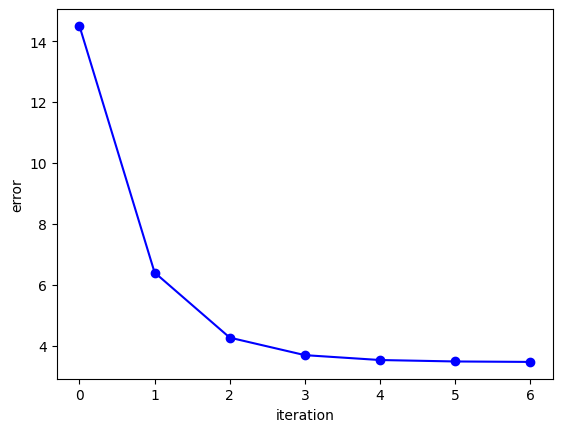

In [19]:
theta = npa([1.,1.])
gradient_descent(gradient, rss, theta, .2, D, .01, 20)

### From regression to classification

**Does our error function make sense?**


iteration 1  
truth=-1  prediction=0 error=1  
truth=1  prediction=-0.8 error=3.24  
**truth=-1  prediction=-1.6 error=0.36**

<br><br>

The above assumes that the output variable $y_i$ is a real number. Thus, this is a model of <span>**regression**</span>.  

When $y$ is disrete, the problem is one of <span>**classification**</span>.  

<br>
Recall our three criterion for the function:

1. $0 \le f(y, \vec{x}) \le 1$  : values are between 0 and 1
2. $\sum_{y_i} f(y_i, \vec{x}) = 1$  : values sum to one for all possible classes
3. If $f(y_i, \vec{x}) > f(y_j, \vec{x})$, then it is more likely that $\vec{x}$ is of class $i$ than of class $j$

<br>
We have satisfied 3 (mostly), but not 1 or 2.


### Logistic Function

The way around this is to change our model. Rather than regression, we need classification. We can do this by passing the dot product $x_i \cdot \theta$ through a “squashing function” (the **logistic function**) that ensures its value is always between 0 and 1:

$$f(\vec{x}_i, \vec{\theta}) = \frac{1}{1 + e^{-\vec{x}_i \cdot \vec{\theta}}}$$

This is called **logistic regression.**


<ipython-input-20-2b6ed1f8514e>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + exp(-f(x, theta)))


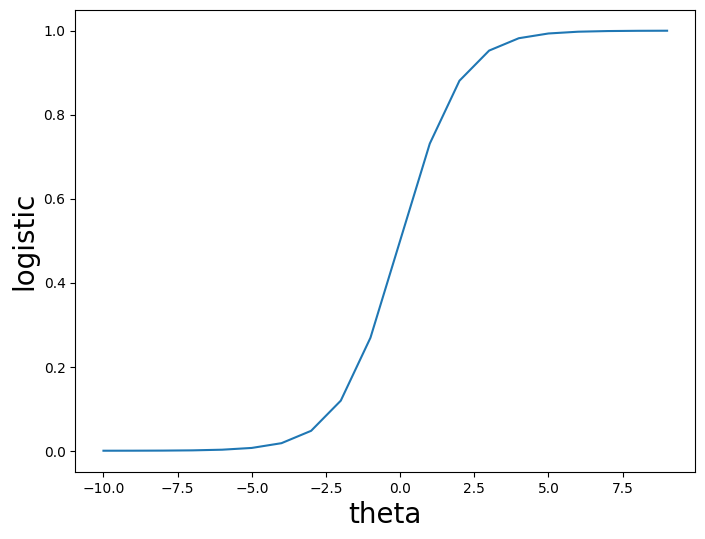

In [20]:
from math import exp
def logistic(x, theta):
    # p(y=1|x)
    return 1 / (1 + exp(-f(x, theta)))

x = npa([1])

plt.figure(figsize=(8,6))
plt.plot(range(-10, 10), [logistic(x, theta) for theta in range(-10, 10)])
plt.xlabel('theta', size=20)
plt.ylabel('logistic', size=20)
plt.show()

Because $f(x_i, \vec{\theta})$ will always be between 0 and 1, and will sum to one for both classes, we have the right to call this a <span>**probability**</span> $p(y_i=1|\vec{x}_i)$.  

$$f(\vec{x}_i) = p(y_i=1|\vec{x}_i) = \frac{1}{1 + e^{-\vec{x}_i \cdot \vec{\theta}}}$$

and, for binary classification, the probability of a negative example:

$$
p(y_i=-1|\vec{x}_i) = 1 - p(y_i=1|\vec{x}_i)
$$

with some algebra, it turns out that:

$$
p(y_i=-1|\vec{x}_i) = \frac{1}{1 + e^{\vec{x}_i \cdot \vec{\theta}}}
$$

(note we no longer have negative sign in front of dot product)


Because of this, if $y_i \in \{-1, 1\}$, we can write:

$$
p(y_i|\vec{x}_i) =  \frac{1}{1 + e^{-y_i \vec{x}_i \cdot \vec{\theta}}}
$$

<br><br>

### Error function for logistic regression

**What is a good error function for logistic regression?**

We can now rephrase our learning objective as maximizing the <span>*joint probability of the true labels for all training instances.*</span>  

Since we assume each instance is drawn independently, we can write this joint probability as a product of individual probabilities:

$$p(y_1 \ldots y_n|\vec{x}_1 \ldots \vec{x}_n) = p(y_1|\vec{x}_1) * p(y_2|\vec{x}_2) * \ldots * p(y_n|\vec{x}_n) = \prod_{i=1}^{n}p(y_i|\vec{x}_i)$$

Because we’re used to minimizing functions using gradient descent, rather than maximizing the probability, we can instead minimize the negative probability. This is our new error function:

$$
E(D, h) = - \prod_{i=1}^{n}p(y_i|x_i)
$$

Note that this is very similar to RSS, but by using probabilities, we ensure that the output for each instance is always between 0 and 1.

<br><br>

Following our learning recipe, our next step is to minimize $E(D,h)$ using gradient descent.  

Computing the gradient of $E(D,h)$ in its current form is rather hard. So, we can simply transform it to something that’s easier to take the gradient of:

$$E(D,h) = - \ln \prod_{i=1}^n  p(y_i|\vec{x}_i) = -\sum_i \ln p(y_i|\vec{x}_i)$$

This is called the <span>**negative log likelihood**</span>. It turns out that minimizing $f(x)$ or $\ln f(x)$ results in the same answer, so we can make this transformation without affecting our final solution.


In [21]:
from math import log

def nll(theta, D):
    total = 0
    predictions = [] # for debugging
    for xi, yi in D:
        pred = logistic(xi, theta) if yi==1 else 1-logistic(xi, theta)
        total += log(pred)
        predictions.append((xi, yi, pred, 1-pred))
    display(pd.DataFrame(predictions, columns=['x', 'y', 'prediction', 'error']))
    return -total


Now we’re ready to calculate the gradient with respect to one parameter $\theta_j$:

$$
\begin{aligned}
\frac{\partial E(D,f)}{\partial \theta_j} & = & \frac{\partial}{\partial \theta_j}- \ln \prod_i \frac{1}{1 + e^{-y_i x_i \cdot \theta}} \\
& = &  \frac{\partial}{\partial \theta_j}-  \sum_i \ln \frac{1}{1 + e^{-y_i x_i \cdot \theta}} \quad \hbox{(by definition of log of products)}\\
& = &  -  \sum_i 1 + e^{-y_i x_i \cdot \theta} \frac{\partial}{\partial \theta_j} \frac{1}{1 + e^{-y_i x_i \cdot \theta}} \quad  \hbox{  (by }\frac{d}{dx}\ln(f(x)) = \frac{1}{f(x)} \frac{d}{dx}f(x) ) \\
& = &  -  \sum_i (1 + e^{-y_i x_i \cdot \theta})\Big(\frac{-y_ix_{ij} e^{-y_ix_i \cdot \theta}}{(1 + e^{-y_ix_i\cdot \theta})^2}\Big) \quad \hbox{    (by quotient and chain rules) }\\
& = & - \sum_i \frac{-y_i x_{ij} e^{-y_i x_i \cdot \theta}}{1 + e^{-y_i x_i \cdot \theta}} \quad \hbox{     (by algebra) }\\
& = & \sum_i y_i x_{ij} (1 - p(y_i | x_i)) \quad \Big( \hbox{by }\frac{e^{-y_i x_i \cdot \theta}}{1 + e^{-y_i x_i \cdot \theta}} = 1 - p(y_i|x_i) \Big)
\end{aligned}
$$

Thus, the final logistic regression update is:

$$
\theta_j^{t+1} \leftarrow \theta_j^{t} + \eta \sum_i y_i x_{ij}(1-p(y_i|\vec{x}_i))
$$



In [22]:
def gradient_logistic(theta, D):
    result = np.zeros(len(theta), dtype=np.float64)
    for xi, yi in D:
        p_y_g_x = logistic(xi, theta) if yi==1 else 1-logistic(xi, theta)
        error = yi * (1-p_y_g_x)
        for j, xij in enumerate(xi):
            result[j] += error * xij
    return -1 * result

,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.731059,0.268941
2,"[1, 1]",-1,0.119203,0.880797
3,"[1, 1]",-1,0.119203,0.880797
4,"[1, 0]",-1,0.268941,0.731059
5,"[1, 1]",1,0.880797,0.119203
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.268941,0.731059




iteration 1
gradient= [2.10450839 2.37344981]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.539467,0.460533
2,"[1, 1]",-1,0.447985,0.552015
3,"[1, 1]",-1,0.447985,0.552015
4,"[1, 0]",-1,0.460533,0.539467
5,"[1, 1]",1,0.552015,0.447985
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.487348,0.512652


old error=8.70686   new error=5.69779  theta=[0.15819664 0.05062007]




iteration 2
gradient= [0.7349797  1.16869824]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.466103,0.533897
2,"[1, 1]",-1,0.634751,0.365249
3,"[1, 1]",-1,0.634751,0.365249
4,"[1, 0]",-1,0.533897,0.466103
5,"[1, 1]",1,0.365249,0.634751
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.602731,0.397269


old error=5.69779   new error=5.1997  theta=[-0.13579524 -0.41685922]




iteration 3
gradient= [0.02795285 0.49301488]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.463322,0.536678
2,"[1, 1]",-1,0.681580,0.318420
3,"[1, 1]",-1,0.681580,0.318420
4,"[1, 0]",-1,0.536678,0.463322
5,"[1, 1]",1,0.318420,0.681580
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.648868,0.351132


old error=5.1997   new error=5.12158  theta=[-0.14697638 -0.61406517]




iteration 4
gradient= [-0.11809565  0.30639297]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.475086,0.524914
2,"[1, 1]",-1,0.697698,0.302302
3,"[1, 1]",-1,0.697698,0.302302
4,"[1, 0]",-1,0.524914,0.475086
5,"[1, 1]",1,0.302302,0.697698
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.676257,0.323743


old error=5.12158   new error=5.08252  theta=[-0.09973812 -0.73662236]




iteration 5
gradient= [-0.14292217  0.23064877]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.489359,0.510641
2,"[1, 1]",-1,0.705048,0.294952
3,"[1, 1]",-1,0.705048,0.294952
4,"[1, 0]",-1,0.510641,0.489359
5,"[1, 1]",1,0.294952,0.705048
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.696118,0.303882


old error=5.08252   new error=5.0552  theta=[-0.04256925 -0.82888187]




iteration 6
gradient= [-0.13642408  0.18873888]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.503000,0.497000
2,"[1, 1]",-1,0.709380,0.290620
3,"[1, 1]",-1,0.709380,0.290620
4,"[1, 0]",-1,0.497000,0.503000
5,"[1, 1]",1,0.290620,0.709380
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.711848,0.288152


old error=5.0552   new error=5.03498  theta=[ 0.01200038 -0.90437742]




iteration 7
gradient= [-0.12214128  0.16001037]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.515210,0.484790
2,"[1, 1]",-1,0.712493,0.287507
3,"[1, 1]",-1,0.712493,0.287507
4,"[1, 0]",-1,0.484790,0.515210
5,"[1, 1]",1,0.287507,0.712493
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.724797,0.275203


old error=5.03498   new error=5.01986  theta=[ 0.06085689 -0.96838157]




iteration 8
gradient= [-0.10706104  0.13772311]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.525897,0.474103
2,"[1, 1]",-1,0.714999,0.285001
3,"[1, 1]",-1,0.714999,0.285001
4,"[1, 0]",-1,0.474103,0.525897
5,"[1, 1]",1,0.285001,0.714999
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.735648,0.264352


old error=5.01986   new error=5.00849  theta=[ 0.10368131 -1.02347081]




iteration 9
gradient= [-0.09320337  0.11935424]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.535182,0.464818
2,"[1, 1]",-1,0.717126,0.282874
3,"[1, 1]",-1,0.717126,0.282874
4,"[1, 0]",-1,0.464818,0.535182
5,"[1, 1]",1,0.282874,0.717126
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.744827,0.255173


old error=5.00849   new error=4.99992  theta=[ 0.14096266 -1.07121251]


error change is too small


,theta,gradient,error
0,"[1.0, 1.0]","[2.1045083911936566, 2.373449812563652]",8.706863
1,"[0.15819664352253726, 0.05062007497453924]","[0.7349796989865959, 1.1686982433339643]",5.697788
2,"[-0.1357952360721011, -0.4168592223590465]","[0.027952849606679875, 0.49301487609340855]",5.199700
3,"[-0.14697637591477303, -0.6140651727964099]","[-0.1180956494701404, 0.306392967999467]",5.121578
4,"[-0.09973811612671687, -0.7366223599961967]","[-0.14292216991557694, 0.23064877081051438]",5.082524
5,"[-0.0425692481604861, -0.8288818683204024]","[-0.1364240766810444, 0.18873887888717855]",5.055198
6,"[0.01200038251193166, -0.9043774198752739]","[-0.12214127860863977, 0.1600103697217753]",5.034982
7,"[0.06085689395538757, -0.968381567763984]","[-0.10706104319184373, 0.13772310507798813]",5.019857
8,"[0.10368131123212507, -1.0234708097951792]","[-0.09320337222377462, 0.11935424253315241]",5.008489


array([ 0.14096266, -1.07121251])

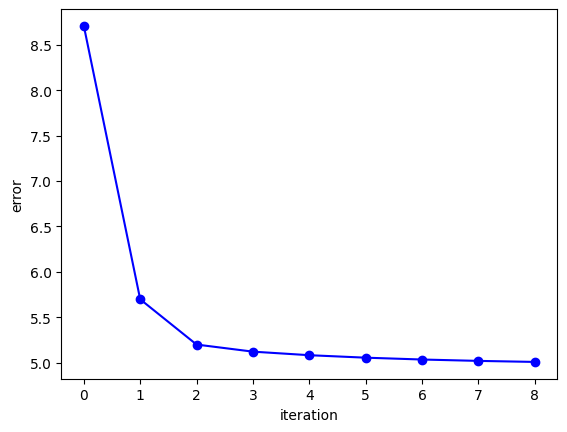

In [23]:
theta = npa([1.,1.])
gradient_descent(gradient_logistic, nll, theta, .4, D, .01, 50)

,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.731059,0.268941
2,"[1, 1]",-1,0.119203,0.880797
3,"[1, 1]",-1,0.119203,0.880797
4,"[1, 0]",-1,0.268941,0.731059
5,"[1, 1]",1,0.880797,0.119203
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.268941,0.731059




iteration 1
gradient= [2.10450839 2.37344981]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.730645,0.269355
2,"[1, 1]",-1,0.119674,0.880326
3,"[1, 1]",-1,0.119674,0.880326
4,"[1, 0]",-1,0.269355,0.730645
5,"[1, 1]",1,0.880326,0.119674
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.269408,0.730592


old error=8.70686   new error=8.69681  theta=[0.99789549 0.99762655]




iteration 2
gradient= [2.10226757 2.37157003]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.730231,0.269769
2,"[1, 1]",-1,0.120146,0.879854
3,"[1, 1]",-1,0.120146,0.879854
4,"[1, 0]",-1,0.269769,0.730231
5,"[1, 1]",1,0.879854,0.120146
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.269875,0.730125


old error=8.69681   new error=8.68677  theta=[0.99579322 0.99525498]




iteration 3
gradient= [2.10002331 2.36968659]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.729817,0.270183
2,"[1, 1]",-1,0.120619,0.879381
3,"[1, 1]",-1,0.120619,0.879381
4,"[1, 0]",-1,0.270183,0.729817
5,"[1, 1]",1,0.879381,0.120619
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.270343,0.729657


old error=8.68677   new error=8.67675  theta=[0.9936932  0.99288529]




iteration 4
gradient= [2.09777563 2.36779951]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.729403,0.270597
2,"[1, 1]",-1,0.121094,0.878906
3,"[1, 1]",-1,0.121094,0.878906
4,"[1, 0]",-1,0.270597,0.729403
5,"[1, 1]",1,0.878906,0.121094
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.270810,0.729190


old error=8.67675   new error=8.66674  theta=[0.99159543 0.99051749]




iteration 5
gradient= [2.09552453 2.36590879]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.728989,0.271011
2,"[1, 1]",-1,0.121569,0.878431
3,"[1, 1]",-1,0.121569,0.878431
4,"[1, 0]",-1,0.271011,0.728989
5,"[1, 1]",1,0.878431,0.121569
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.271277,0.728723


old error=8.66674   new error=8.65676  theta=[0.9894999  0.98815159]


error change is too small


,theta,gradient,error
0,"[1.0, 1.0]","[2.1045083911936566, 2.373449812563652]",8.706863
1,"[0.9978954916088063, 0.9976265501874364]","[2.1022675684422487, 2.3715700306437886]",8.696806
2,"[0.9957932240403641, 0.9952549801567926]","[2.1000233104789077, 2.369686593849796]",8.686767
3,"[0.9936932007298852, 0.9928852935629428]","[2.0977756270543555, 2.3677995097605358]",8.676746
4,"[0.9915954251028308, 0.9905174940531822]","[2.095524528014537, 2.3659087860531924]",8.666743


array([0.9894999 , 0.98815159])

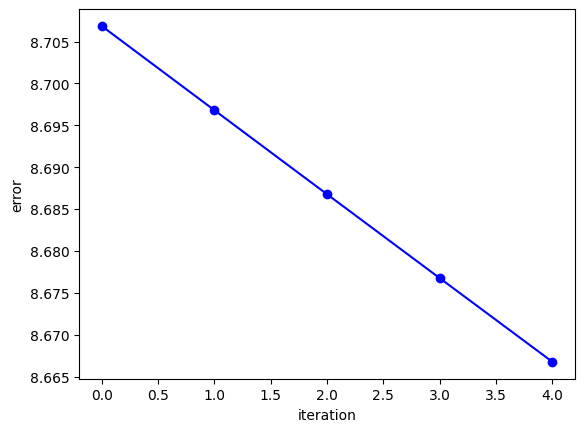

In [24]:
# What if learning rate too small?
theta = npa([1.,1.])
gradient_descent(gradient_logistic, nll, theta, .001, D, .01, 50)
# We stop too early!

### Regularization

Recall original error function for logistic regression:

$$
E(D, h) = - \prod_{i=1}^{n}p(y_i|x_i)
$$

**What is the range of values for $E(D, h)$?**

<br><br><br><br><br><br><br><br><br><br><br><br>

error $ \in \{-1, 0\} $


## Which is best?
```python
theta = np.array([-10, 10, -10, 10])      # error=0
theta = np.array([100, -100, 100, -100])  # error=-1.0
theta = np.array([10, -10, 10, -10])      # error=-0.999
```

<br><br><br>

Is the second really better than the first?

<br><br><br><br>

**Regularization** Controls how many parameters the model has, or how large each parameter can get.

### L2 Regularization for logistic regression:

$$
E(D, \theta) =  - \prod_{i \in D} p(y_i|x_i) + \frac{1}{C}||\vec{\theta}||^2_2
$$

$$
 =  - \prod_{i \in D} p(y_i|x_i) + \frac{1}{C}\sum_k \theta_k^2
$$

As $C \rightarrow 0$, the classifier prefers smaller and smaller coefficients.

This is the $C$ parameter of the `LogisticRegression` class in sklearn.


<br><br><br><br><br><br>

### L1 Regularization for logistic regression

Penalize by absolute value of coefficients (rather than square):

$$
E(D, \theta) = - \prod_{i \in D} p(y_i|x_i) + \frac{1}{C}\sum_k |\theta_k|
$$


### Effect of C on L2

It is common to tune the value of C for optimal accuracy. Here are sample outputs for classifying the sentiment on movie reviews posted to IMDB.com.

![figs/l2.png](https://github.com/tulane-cmps6730/main/blob/main/lec/classify/figs/l2.png?raw=1)

![figs/l2coef.png](https://github.com/tulane-cmps6730/main/blob/main/lec/classify/figs/l2coef.png?raw=1)


### Effect of C on L1

![figs/l1.png](https://github.com/tulane-cmps6730/main/blob/main/lec/classify/figs/l1.png?raw=1)

![figs/l1coef.png](https://github.com/tulane-cmps6730/main/blob/main/lec/classify/figs/l1coef.png?raw=1)

## Image Sources
- https://www.cs.colorado.edu/~martin/SLP/
- http://nlp.stanford.edu/IR-book/